In [ ]:
import os
import h5py
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
! git clone https://github.com/pierinim/tutorials.git
! ls tutorials/Data/JetDataset/


Cloning into 'tutorials'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 668 (delta 47), reused 71 (delta 29), pack-reused 579
Receiving objects: 100% (668/668), 550.21 MiB | 39.46 MiB/s, done.
Resolving deltas: 100% (249/249), done.
Checking out files: 100% (62/62), done.
jetImage_7_100p_0_10000.h5	jetImage_7_100p_50000_60000.h5
jetImage_7_100p_10000_20000.h5	jetImage_7_100p_60000_70000.h5
jetImage_7_100p_30000_40000.h5	jetImage_7_100p_70000_80000.h5
jetImage_7_100p_40000_50000.h5	jetImage_7_100p_80000_90000.h5


In [ ]:
target = np.array([])
jetList = np.array([])
datafiles =  ['tutorials/Data/JetDataset/jetImage_7_100p_30000_40000.h5',
           'tutorials/Data/JetDataset/jetImage_7_100p_60000_70000.h5',
            'tutorials/Data/JetDataset/jetImage_7_100p_50000_60000.h5',
            'tutorials/Data/JetDataset/jetImage_7_100p_10000_20000.h5',
            'tutorials/Data/JetDataset/jetImage_7_100p_0_10000.h5']
for fileIN in datafiles:
  print("Appending %s" %fileIN)
  f = h5py.File(fileIN)
  myJetList = np.array(f.get("jetConstituentList"))
  mytarget = np.array(f.get('jets')[0: ,-6:-1])
  jetList = np.concatenate([jetList,myJetList], axis =0) if jetList.size else myJetList
  target = np.concatenate([target,mytarget], axis = 0) if target.size else mytarget
  del myJetList, mytarget
  f.close()
print(target.shape,jetList.shape)  


Appending tutorials/Data/JetDataset/jetImage_7_100p_30000_40000.h5
Appending tutorials/Data/JetDataset/jetImage_7_100p_60000_70000.h5
Appending tutorials/Data/JetDataset/jetImage_7_100p_50000_60000.h5
Appending tutorials/Data/JetDataset/jetImage_7_100p_10000_20000.h5
Appending tutorials/Data/JetDataset/jetImage_7_100p_0_10000.h5
(50000, 5) (50000, 100, 16)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(jetList, target, test_size=0.33)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
del jetList, target

(33500, 100, 16) (16500, 100, 16) (33500, 5) (16500, 5)


In [ ]:
# keras imports
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, GRU, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

In [ ]:
featureArrayLength = (X_train.shape[1],X_train.shape[2])
dropoutRate = 0.25

In [ ]:
inputList = Input(shape=(featureArrayLength))
x=GRU(40,activation="tanh", recurrent_activation='sigmoid')(inputList)
x=Dropout(dropoutRate)(x)
#
x=Dense(20,activation='relu')(x)
x=Dropout(dropoutRate)(x)
#
x=Dense(10,activation='relu')(x)
x=Dropout(dropoutRate)(x)
x=Dense(5,activation='relu')(x)
#
output = Dense(5,activation ='softmax')(x)
####
model =Model(inputs= inputList, outputs=output)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 16)]         0         
                                                                 
 gru_3 (GRU)                 (None, 40)                6960      
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0     

In [ ]:
batch_size= 128
n_epochs = 200

In [ ]:
# train 
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose = 2,
                validation_data=(X_val, y_val),
                callbacks = [
                EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                TerminateOnNaN()])

Epoch 1/200
262/262 - 10s - loss: 1.5328 - val_loss: 1.4068 - lr: 0.0010 - 10s/epoch - 37ms/step
Epoch 2/200
262/262 - 4s - loss: 1.3950 - val_loss: 1.3894 - lr: 0.0010 - 4s/epoch - 14ms/step
Epoch 3/200
262/262 - 3s - loss: 1.3752 - val_loss: 1.3492 - lr: 0.0010 - 3s/epoch - 10ms/step
Epoch 4/200
262/262 - 2s - loss: 1.3596 - val_loss: 1.3517 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 5/200
262/262 - 3s - loss: 1.3451 - val_loss: 1.3330 - lr: 0.0010 - 3s/epoch - 10ms/step
Epoch 6/200
262/262 - 2s - loss: 1.3369 - val_loss: 1.3234 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 7/200
262/262 - 2s - loss: 1.3228 - val_loss: 1.3136 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 8/200
262/262 - 2s - loss: 1.3189 - val_loss: 1.3126 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 9/200
262/262 - 2s - loss: 1.3129 - val_loss: 1.3078 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 10/200
262/262 - 2s - loss: 1.3068 - val_loss: 1.3125 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 11/200
262/262 - 2s - loss: 1.3030 - val_loss: 

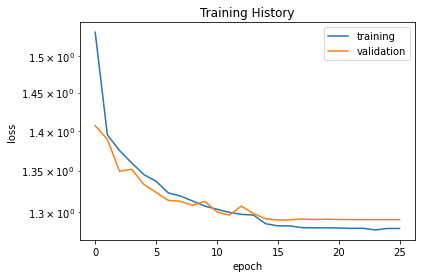

In [ ]:
# plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('Training History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
labels = ['gluon', 'quark', 'W', 'Z', 'top']

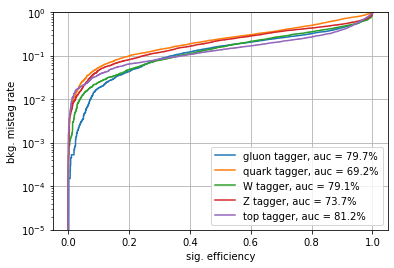

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
predict_val = model.predict(X_val)
df = pd.DataFrame()
fpr = {}
tpr = {}
auc1 = {}

plt.figure()
for i, label in enumerate(labels):
        df[label] = y_val[:,i]
        df[label + '_pred'] = predict_val[:,i]

        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])

        auc1[label] = auc(fpr[label], tpr[label])

        plt.plot(tpr[label],fpr[label],label='%s tagger, auc = %.1f%%'%(label,auc1[label]*100.))
plt.semilogy()
plt.xlabel("sig. efficiency")
plt.ylabel("bkg. mistag rate")
plt.ylim(0.00001,1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()